[ Factory image ]

How do we interactively visualize our Pie Factory.





In [1]:
!conda install -y -n py3k --channel https://conda.anaconda.org/conda-forge bqplot



Fetching package metadata .........
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /Users/brray/anaconda2/anaconda/envs/py3k:
#
bqplot                    0.8.4                    py35_0    conda-forge


<IPython.core.display.Javascript object>


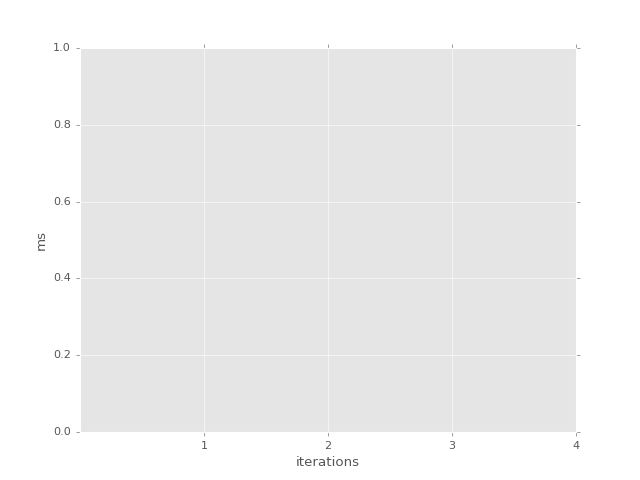

<IPython.core.display.Javascript object>


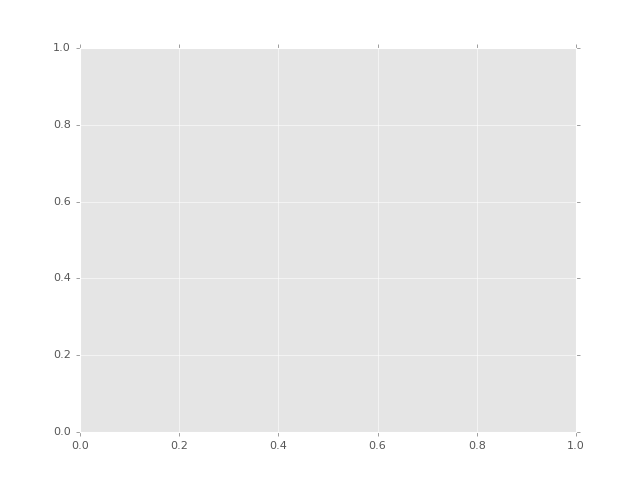

/Users/brray/anaconda2/anaconda/envs/py3k/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [3]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets
plt.style.use('ggplot')

NUMBER_OF_PINGS = 4

# displaying the text widget
text = widgets.Text(description="Domain to ping", width=200)
display(text)

# preparing the plot 
data = pd.DataFrame()
x = range(1,NUMBER_OF_PINGS+1)
plots = dict()
fig, ax = plt.subplots()
plt.xlabel('iterations')
plt.ylabel('ms')
plt.xticks(x)
plt.show()

# preparing a container to put in created checkbox per domain
checkboxes = []
cb_container = widgets.HBox()
display(cb_container)

# add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update the graph")

# function to deal with the added domain name
def handle_submit(sender):
    # a part of the magic inside python : pinging
    res = !ping -c {NUMBER_OF_PINGS} {text.value}
    hits = res.grep('64 bytes').fields(-2).s.replace("time=","").split()
    if len(hits) == 0:
        print( "Domain gave error on pinging" )
    else:
         # rebuild plot based on ping result
        data[text.value] = hits
        data[text.value] = data[text.value].astype(float)
        plots[text.value], = ax.plot(x, data[text.value], label=text.value)
        plt.legend()
        plt.draw()
        # add a new checkbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=[i for i in checkboxes]
        if len(checkboxes) == 1:
            display(button)

# function to deal with the checkbox update button       
def on_button_clicked(b):
    for c in cb_container.children:
        if not c.value:
            plots[c.description].set_visible(False)
        else:
            plots[c.description].set_visible(True)
    plt.legend()
    plt.draw()

button.on_click(on_button_clicked)
text.on_submit(handle_submit)
plt.show()

In [3]:

# initializing data to be plotted
np.random.seed(0)
size = 100
y_data = np.cumsum(np.random.randn(size) * 100.0)
y_data_2 = np.cumsum(np.random.randn(size))
y_data_3 = np.cumsum(np.random.randn(size) * 100.)

x = np.linspace(0.0, 10.0, size)

In [4]:
price_data = pd.DataFrame(np.cumsum(np.random.randn(150, 2).dot([[0.5, 0.8], [0.8, 1.0]]), axis=0) + 100,
                          columns=['Security 1', 'Security 2'],
                          index=pd.date_range(start='01-01-2007', periods=150))

symbol = 'Security 1'
dates_all = price_data.index.values
final_prices = price_data[symbol].values.flatten()

In [5]:

plt.figure()
plt.plot(x, y_data)
plt.show()

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [7]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enable an nbextension in frontend configuration.

Usage
    jupyter nbextension enable [--system|--sys-prefix]

Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--python
    Install from a Python package
--sys-prefix
    Use sys.prefix as the prefix for installing nbextensions (for environments, packaging)
--user
    Apply the operation only for the given user
--debug
    set log level to logging.DEBUG (maximize logging output)
--py
    Install from a Python package
--system
    Apply the operation system-wide
--section=<Unicode> (ToggleNBExtensionApp.section)
    Default: 'notebook'
    Which config section to add the extension to, 'common' will affect all
    pages.

To see all available configurables, use `--help-all`

Bad config encountered during initialization:
Unrecognized flag: '-n'


In [8]:
%matplotlib inline

In [9]:

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

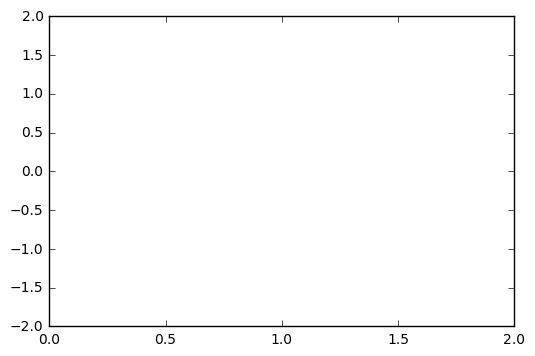

In [10]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [11]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [12]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [13]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [14]:
HTML(anim.to_html5_video())

RuntimeError: No MovieWriters available!

In [15]:
!conda install -n py3k pie_widget

Fetching package metadata .......
Solving package specifications: .


PackageNotFoundError: Package not found: '' Package missing in current osx-64 channels: 
  - pie_widget

Close matches found; did you mean one of these?

    pie_widget: ipywidgets

You can search for packages on anaconda.org with

    anaconda search -t conda pie_widget


